
# Notebook Intentions

The purpose of this notebook is to simulate an amusement park. 


In [1]:
from park import Park
from behavior_reference import BEHAVIOR_ARCHETYPE_PARAMETERS

### Book Keeping

    - Version: dictates the location performance graphs are stored
    - Verbosity: controls much information is displayed during a simulation, increase to show more info
    - Show Plots: controls whether park plots are displayed in this notebook
    - RNG Seed: seeds random number generators to enforce identical results across runs/machines
    

In [2]:
VERSION = "20K All FP - MIKE"
VERBOSITY = 1
SHOW_PLOTS = True
RNG_SEED = 10


## Park
 
The park contains Agents, Attractions and Activities.

- Total Daily Agents: dictates how many agents visit the park within a day
- Hourly Percent: dictates what percentage of Total Daily Agents visits the park at each hour
- Perfect Arrivals: enforces that the exact amount of Total Daily Agents arrives during the day
- Expedited Pass Ability Percent: percent of agents aware of expeditied passes
- Expedited Threshold: acceptable queue wait time length before searching for an expedited pass
- Expedited Limit: total number of expedited pass an agent can hold at any given time


In [3]:
TOTAL_DAILY_AGENTS = 50000 #38047 actual average
PERFECT_ARRIVALS = True
HOURLY_PERCENT = {
    "10:00 AM": 18,
    "11:00 AM": 23,
    "12:00 PM": 17,
    "1:00 PM": 15,
    "2:00 PM": 9,
    "3:00 PM": 7,
    "4:00 PM": 2,
    "5:00 PM": 5,
    "6:00 PM": 3,
    "7:00 PM": 1,
    "8:00 PM": 0,
    "9:00 PM": 0,
    "10:00 PM": 0
}
EXP_ABILITY_PCT = 0.95
EXP_THRESHOLD = 30
EXP_LIMIT = 1

## Agents

The park is populated by agents. Agents visit attractions and activities. They make decisions about where to go based on their preferences, the popularity of attractions and activities and waiting times. Each Agent has a behavioral archetype.

- Ride Enthusiast: wants to stay for a long time, go on as many attractions as possible, doesn't want to visit activites, doesn't mind waiting
- Ride Favorer: wants to go on a lot of attractions, but will vists activites occasionally, will wait for a while in a queue
- Park Tourer: wants to stay for a long time and wants to see attractions and activities equally, reasonable about wait times
- Park Visitor: doesn't want to stay long and wants to see attractions and activities equally, inpatient about wait times
- Activity Favorer: doesn't want to stay long and prefers activities, reasonable about wait times
- Activity Enthusiast: wants to visit a lot of activities, reasonable about wait times

Archetypes can be tweaked and new archetypes can be added in `behavior_reference.py`. 

- Agent Archetype Distribution: dictates the probability an agent will have a particular behavioral archetype


In [4]:
AGENT_ARCHETYPE_DISTRIBUTION = {
    "ride_enthusiast": 10,
    "ride_favorer": 15,
    "park_tourer": 25,
    "park_visitor": 30,
    "activity_favorer": 15,
    "activity_enthusiast": 5,
}


## Attractions

Attractions are essentially rides within a park. 

- Attractions: list of dictionaries that describe the attractions within the park
    - Name: name of the attraction
    - Run Time: How long the attraction take to run, in minutes
    - Capacity: Maximium number of agents that can be on the attraction during a run
    - Popularity: Value from 1-10 that describes how popular an attraction is with respect to other attractions
    - Expedited Queue: Dictates whether the attraction has an expedited queue or not
    - Expedited Queue Ratio: Dictates what percentage of attraction capacity is devoted to members of the expedited queue
    - Child Eligible: Dictates whether children can ride the attraction
    - Adult Eligible: Dictates whether adults can ride the attraction

In [5]:
ATTRACTIONS = [
    {
        "name": "Ride of Passage",
        "run_time": 5,
        "park_area": "Pandora",
        "hourly_throughput": 1600,
        "popularity": 10,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Serengeti Safari",
        "run_time": 20,
        "park_area": "Africa",
        "hourly_throughput": 3000,
        "popularity": 9,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Annapurna Adventure",
        "run_time": 3,
        "park_area": "Asia",
        "hourly_throughput": 2000,
        "popularity": 8,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": False,
        "adult_eligible": True,
    },
    {
        "name": "Kaveri Rapids",
        "run_time": 5,
        "park_area": "Asia",
        "hourly_throughput": 2000,
        "popularity": 7,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Agave River Journey",
        "run_time": 5,
        "park_area": "Pandora",
        "hourly_throughput": 1200,
        "popularity": 6,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Dinosaur",
        "run_time": 4,
        "park_area": "Dinoland USA",
        "hourly_throughput": 2400,
        "popularity": 5,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": False,
        "adult_eligible": True,
    },
    {
        "name": "Primeval Hurl",
        "run_time": 2,
        "park_area": "Dinoland USA",
        "hourly_throughput": 1000,
        "popularity": 4,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    }
]

## Activities
Activities are everything to do within the park that isn't an attraction. 

- Activities: list of dictionaries that describe activities within the park
    - Name: name of the activity
    - Popularity: Value from 1-10 that describes how popular an activity is with respect to other activities
    - Mean Time: The expected time agents will spend at an activity

In [6]:
ACTIVITIES = [
    {
        "name": "sightseeing",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 5
    },
    {
        "name": "show",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 30
    },
    {
        "name": "merchandise",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 30
    },
    {
        "name": "food",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 45
    }
]

## Park Map
The park map is a reference of walking distance (minutes) between park areas.  Each attraction and activity is in one park area.

- PARK_MAP: dictionary of dictionaries that describe travel times between every possible pair of park areas.
    - SOURCE_PARK_AREA:
    - { DESTINATION_PARK_AREA: travel_time (in minutes), ... }

In [7]:
PARK_MAP = {
    "Discovery Island":
        {
            "Discovery Island": 1,  # distance for POI within same area
            "Pandora": 5,
            "Africa": 5,
            "Asia": 5,
            "Dinoland USA": 5,
            "Oasis": 3
        },
    "Pandora":
        {
            "Discovery Island": 5,
            "Pandora": 2,
            "Africa": 8,
            "Asia": 10,
            "Dinoland USA": 10,
            "Oasis": 8
        },
    "Africa":
        {
            "Discovery Island": 5,
            "Pandora": 8,
            "Africa": 2,
            "Asia": 6,
            "Dinoland USA": 10,
            "Oasis": 8
        },
    "Asia":
        {
            "Discovery Island": 5,
            "Pandora": 10,
            "Africa": 6,
            "Asia": 2,
            "Dinoland USA": 5,
            "Oasis": 8
        },
    "Dinoland USA":
        {
            "Discovery Island": 5,
            "Pandora": 10,
            "Africa": 10,
            "Asia": 5,
            "Dinoland USA": 1,
            "Oasis": 8
        },
    "Oasis":
        {
            "Discovery Island": 3,
            "Pandora": 8,
            "Africa": 8,
            "Asia": 8,
            "Dinoland USA": 8,
            "Oasis": 1
        }
}

## Entrance Park Area

This field defines the park area of the main gate, where agents start and end their park visit.

In [8]:
ENTRANCE_PARK_AREA = "Oasis"

## Plots

Set the Y limit of plots

In [9]:
PLOT_RANGE = {
    "Attraction Queue Length": 'auto',
    "Attraction Wait Time": 'auto',
    "Attraction Expedited Queue Length": 'auto',
    "Attraction Expedited Wait Time": 'auto',
    "Activity Vistors": 'auto',
    "Approximate Agent Distribution (General)": 1.0,
    "Approximate Agent Distribution (Specific)": 1.0,
    "Attraction Average Wait Times": 'auto',
    "Agent Attractions Histogram": 1.0,
    "Attraction Total Visits": 'auto',
    "Expedited Pass Distribution": 'auto',
    "Age Class Distribution": 'auto',
}

## Simulation

Run the simulation here.

Time: 0
Total Agents in Park: 162
Attraction Wait Times (Minutes):
     Primeval Hurl: 0.0
     Dinosaur: 0.0
     Agave River Journey: 0.0
     Kaveri Rapids: 0.0
     Annapurna Adventure: 0.0
     Serengeti Safari: 0.0
     Ride of Passage: 0.0
Activity Visitor (Agents):
     sightseeing: 0
     show: 0
     merchandise: 0
     food: 0
--------------------------------------------------

Time: 60
Total Agents in Park: 9233
Attraction Wait Times (Minutes):
     Primeval Hurl: 0.0
     Dinosaur: 4.0
     Agave River Journey: 25.0
     Kaveri Rapids: 15.0
     Annapurna Adventure: 6.0
     Serengeti Safari: 40.0
     Ride of Passage: 30.0
Activity Visitor (Agents):
     sightseeing: 259
     show: 1481
     merchandise: 1505
     food: 1865
--------------------------------------------------

Time: 120
Total Agents in Park: 20540
Attraction Wait Times (Minutes):
     Primeval Hurl: 86.0
     Dinosaur: 12.0
     Agave River Journey: 35.0
     Kaveri Rapids: 30.0
     Annapurna Adventure: 3

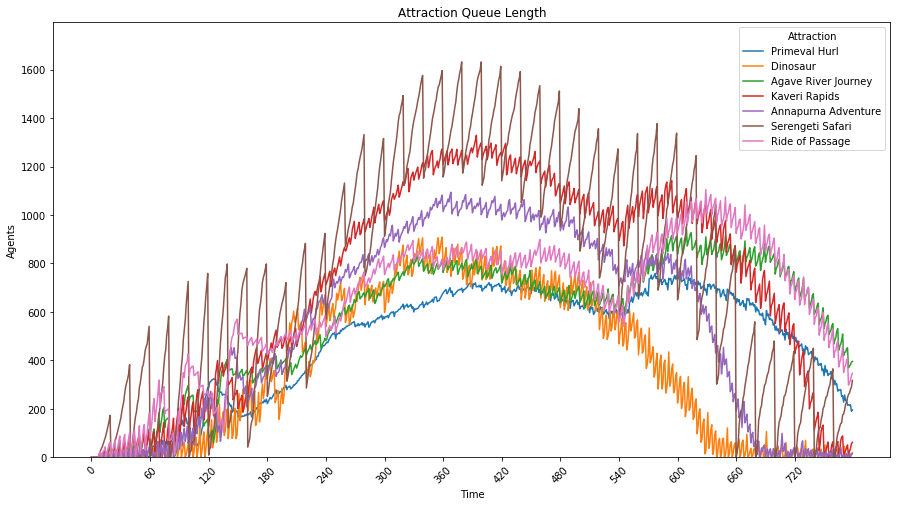

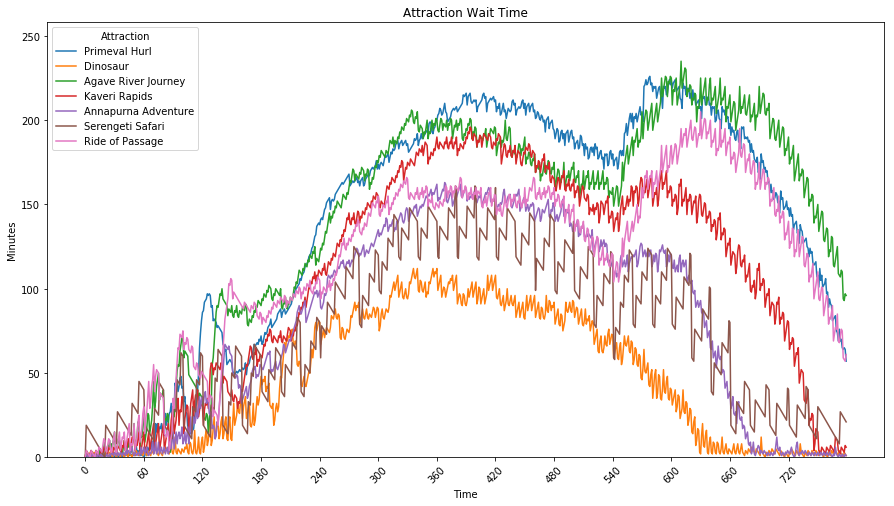

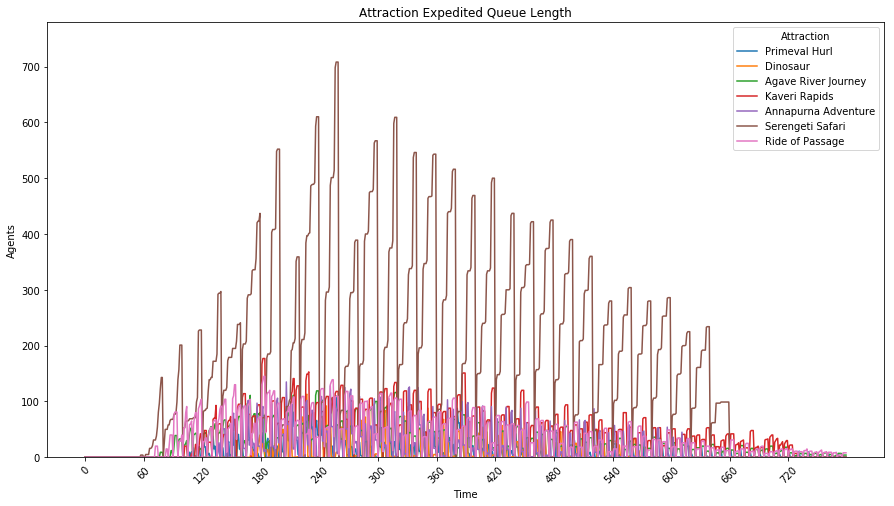

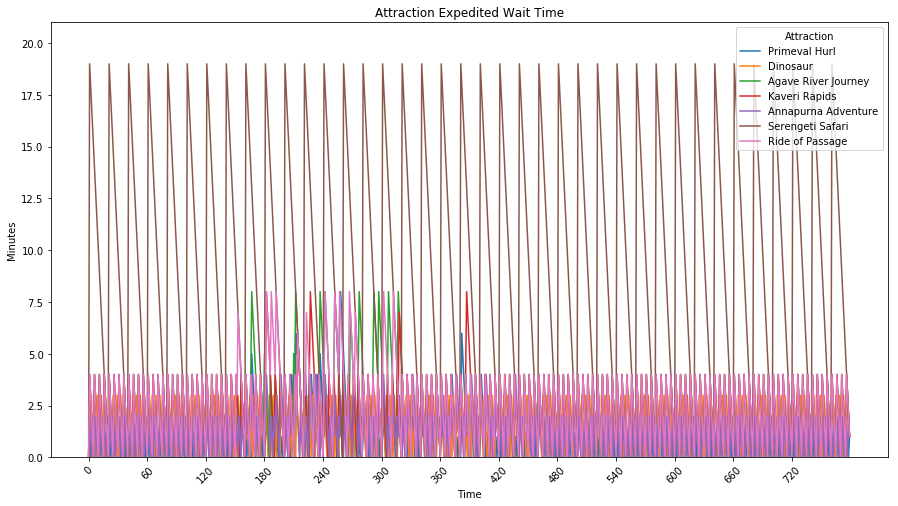

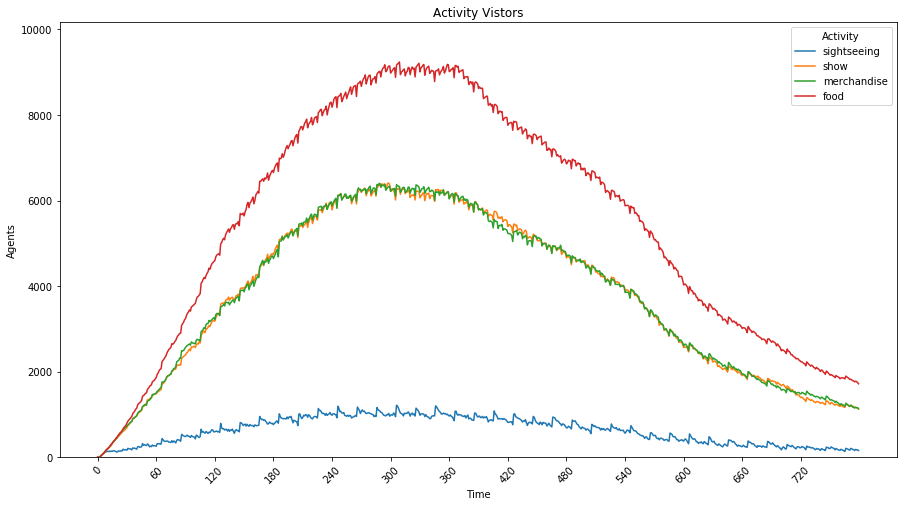

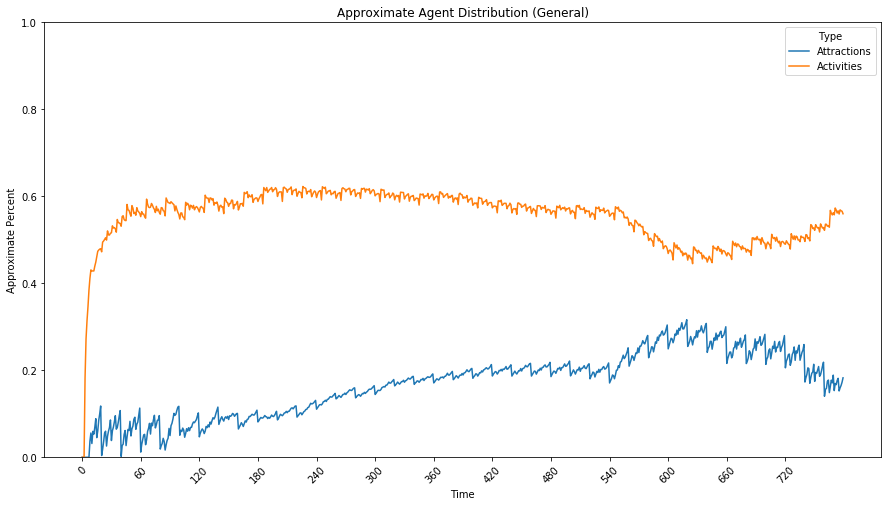

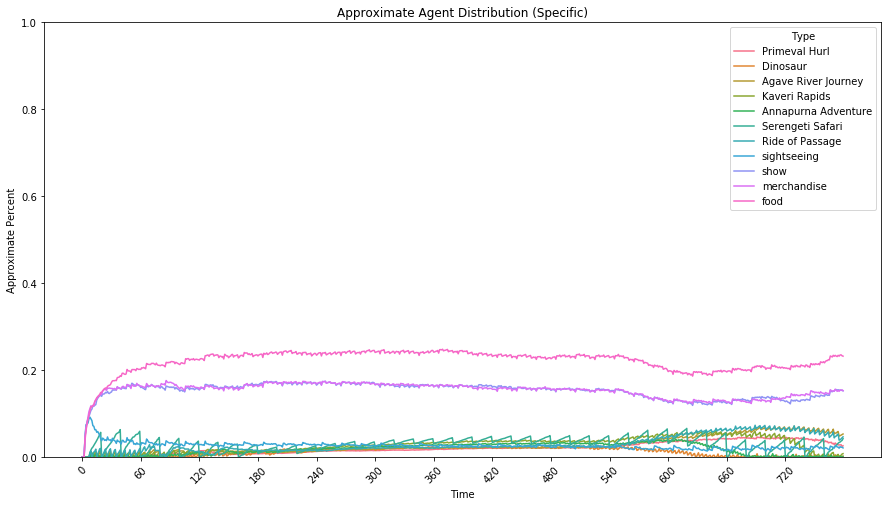

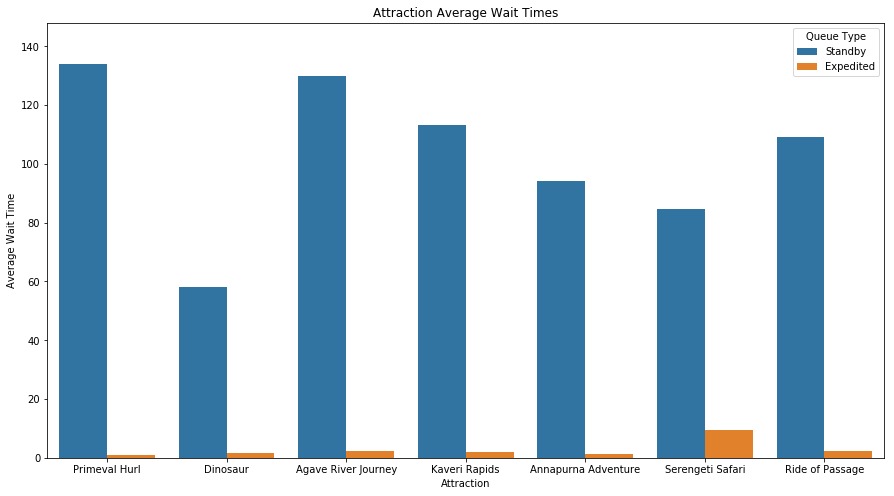

+---------------------+---------------------+--------------+
| Attraction          |   Average Wait Time | Queue Type   |
|---------------------+---------------------+--------------|
| Primeval Hurl       |                0.93 | Expedited    |
| Dinosaur            |                1.50 | Expedited    |
| Agave River Journey |                2.37 | Expedited    |
| Kaveri Rapids       |                2.14 | Expedited    |
| Annapurna Adventure |                1.25 | Expedited    |
| Serengeti Safari    |                9.48 | Expedited    |
| Ride of Passage     |                2.39 | Expedited    |
| Primeval Hurl       |              134.14 | Standby      |
| Dinosaur            |               58.12 | Standby      |
| Agave River Journey |              130.07 | Standby      |
| Kaveri Rapids       |              113.32 | Standby      |
| Annapurna Adventure |               94.28 | Standby      |
| Serengeti Safari    |               84.73 | Standby      |
| Ride of Passage     | 

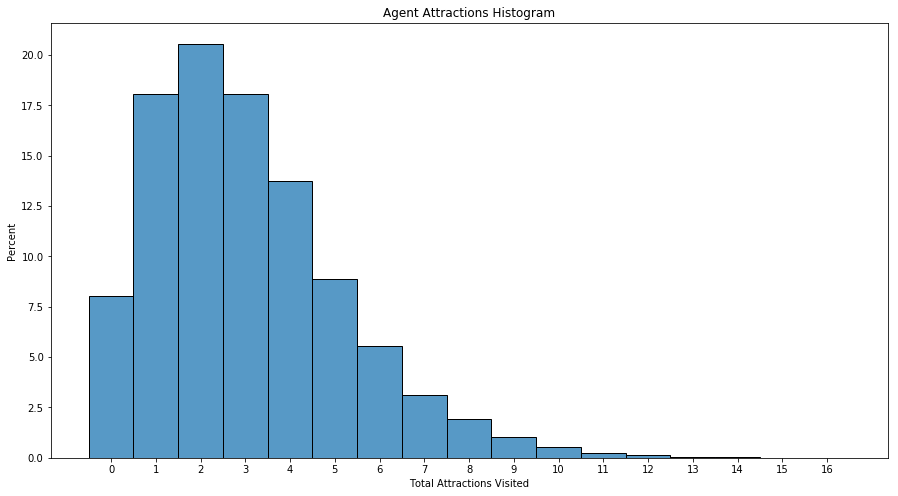

+----------+-----------------------------+
| Metric   |   Total Attractions Visited |
|----------+-----------------------------|
| count    |                    50000.00 |
| mean     |                        3.04 |
| std      |                        2.16 |
| min      |                        0.00 |
| 25%      |                        1.00 |
| 50%      |                        3.00 |
| 75%      |                        4.00 |
| max      |                       16.00 |
+----------+-----------------------------+


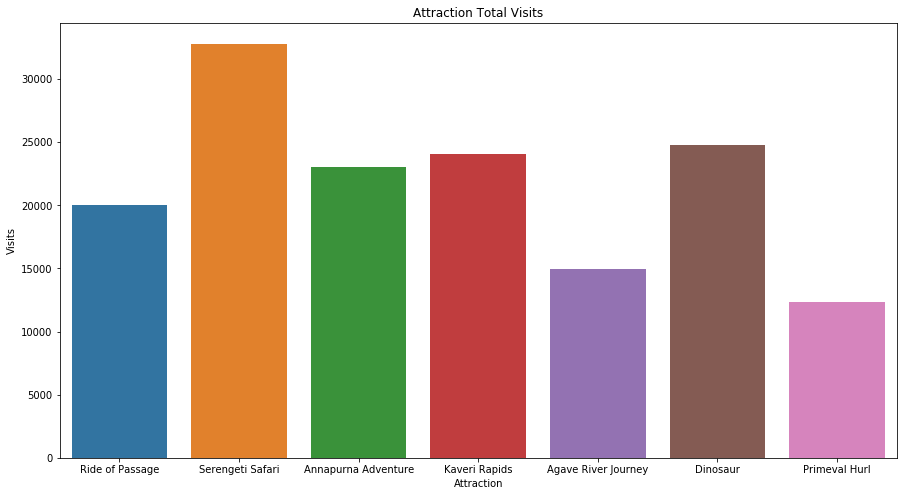

+---------------------+----------+
| Attraction          |   Visits |
|---------------------+----------|
| Agave River Journey |    14916 |
| Annapurna Adventure |    23013 |
| Dinosaur            |    24781 |
| Kaveri Rapids       |    24054 |
| Primeval Hurl       |    12315 |
| Ride of Passage     |    20023 |
| Serengeti Safari    |    32797 |
+---------------------+----------+


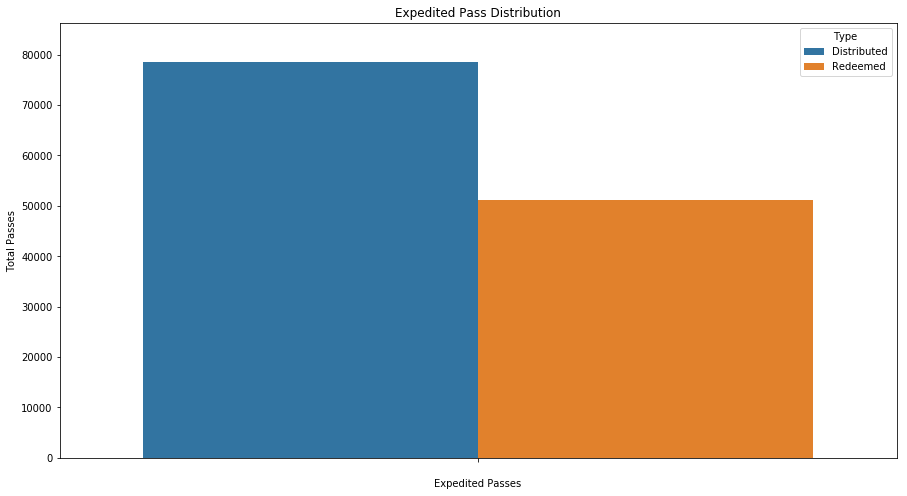

+--------------------+----------------+-------------+
| Expedited Passes   |   Total Passes | Type        |
|--------------------+----------------+-------------|
|                    |          78467 | Distributed |
|                    |          51179 | Redeemed    |
+--------------------+----------------+-------------+


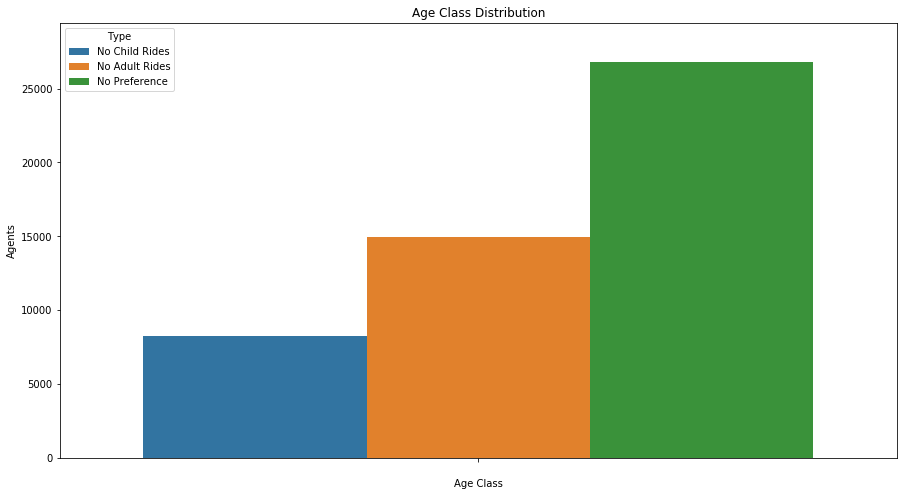

+-------------+----------+----------------+
| Age Class   |   Agents | Type           |
|-------------+----------+----------------|
|             |    14981 | No Adult Rides |
|             |     8247 | No Child Rides |
|             |    26772 | No Preference  |
+-------------+----------+----------------+
Agent ID: 40822
Agent Archetype: park_visitor
Agent arrived at park at time 296. Agent picked up an expedited pass for Agave River Journey at time 304. The expedited queue return time is in 286 minutes. Agent visited the activity merchandise at time 310. Agent exited the activity merchandise at time 337. Agent visited the activity show at time 339. Agent exited the activity show at time 366. Agent visited the activity sightseeing at time 368. Agent exited the activity sightseeing at time 372. Agent visited the activity sightseeing at time 374. Agent exited the activity sightseeing at time 378. Agent visited the activity merchandise at time 380. Agent exited the activity merchandise a

In [10]:
# Initialize Park
RNG_SEED = 5

park = Park(
    attraction_list=ATTRACTIONS,
    activity_list=ACTIVITIES,
    park_map=PARK_MAP,
    entrance_park_area=ENTRANCE_PARK_AREA,
    plot_range=PLOT_RANGE,
    random_seed=RNG_SEED,
    version=VERSION,
    verbosity=VERBOSITY
)

# Build Arrivals

park.generate_arrival_schedule(
    arrival_seed=HOURLY_PERCENT, 
    total_daily_agents=TOTAL_DAILY_AGENTS, 
    perfect_arrivals=PERFECT_ARRIVALS,
)

# Build Agents
park.generate_agents(
    behavior_archetype_distribution=AGENT_ARCHETYPE_DISTRIBUTION,
    exp_ability_pct=EXP_ABILITY_PCT,
    exp_wait_threshold=EXP_THRESHOLD,
    exp_limit=EXP_LIMIT
)

# Build Attractions + Activities
park.generate_attractions()
park.generate_activities()

# Pass Time
for _ in range(len(HOURLY_PERCENT.keys()) * 60):
    park.step()

# Save Parameters of Current Run
sim_parameters = {
    "VERSION": VERSION,
    "VERBOSITY": VERBOSITY,
    "SHOW_PLOTS": SHOW_PLOTS,
    "RNG_SEED": RNG_SEED,
    "TOTAL_DAILY_AGENTS": TOTAL_DAILY_AGENTS,
    "PERFECT_ARRIVALS": PERFECT_ARRIVALS,
    "HOURLY_PERCENT": HOURLY_PERCENT,
    "EXP_ABILITY_PCT": EXP_ABILITY_PCT,
    "EXP_THRESHOLD": EXP_THRESHOLD,
    "EXP_LIMIT": EXP_LIMIT,
    "AGENT_ARCHETYPE_DISTRIBUTION": AGENT_ARCHETYPE_DISTRIBUTION,
    "ATTRACTIONS": ATTRACTIONS,
    "ACTIVITIES": ACTIVITIES,
    "BEHAVIOR_ARCHETYPE_PARAMETERS": BEHAVIOR_ARCHETYPE_PARAMETERS,
}
park.write_data_to_file(
    data=sim_parameters, 
    output_file_path=f"{VERSION}/parameters", 
    output_file_format="json"
)

# Store + Print Data
park.make_plots(show=SHOW_PLOTS)
park.print_logs(N = 5)
#park.print_logs(selected_agent_ids = [778])

In [11]:
park.agents[2].log
#park.plot_range = PLOT_RANGE
#park.make_plots(show=SHOW_PLOTS)

'Agent arrived at park at time 0. Agent visited the activity show at time 3. Agent exited the activity show at time 33. Agent entered queue for Annapurna Adventure at time 39. Agent boarded Annapurna Adventure at time 39. Agent exited Annapurna Adventure at time 42. Agent entered queue for Agave River Journey at time 53. Agent boarded Agave River Journey at time 55. Agent exited Agave River Journey at time 60. Agent entered queue for Serengeti Safari at time 69. Agent boarded Serengeti Safari at time 80. Agent exited Serengeti Safari at time 100. Agent entered queue for Serengeti Safari at time 103. Agent boarded Serengeti Safari at time 120. Agent exited Serengeti Safari at time 140. Agent picked up an expedited pass for Annapurna Adventure at time 147. The expedited queue return time is in 13 minutes. Agent visited the activity show at time 153. Agent exited the activity show at time 160. Agent entered exp queue for Annapurna Adventure at time 166. Agent boarded Annapurna Adventure a

In [12]:
#import numpy as np
#rng = np.random.default_rng(10+23496)
#mean_time = 45
#rng.normal(mean_time, mean_time/2, 15)
#max((rng.normal(mean_time, mean_time/2, 1))[0], 1)
#park.activities['food'].state["visitor_time_remaining"]

#[
#            (ind, agent_id) for ind, agent_id in enumerate(park.activities['food'].state["visitors"])
#            if park.activities['food'].state["visitor_time_remaining"][ind] == 0
#        ]

park.agents[11748].log

'Agent arrived at park at time 74. Agent visited the activity food at time 77. Agent exited the activity food at time 113. Agent visited the activity show at time 115. Agent exited the activity show at time 139. Agent visited the activity sightseeing at time 141. Agent exited the activity sightseeing at time 145. Agent visited the activity merchandise at time 147. Agent exited the activity merchandise at time 171. Agent picked up an expedited pass for Kaveri Rapids at time 177. The expedited queue return time is in 58 minutes. Agent visited the activity merchandise at time 183. Agent exited the activity merchandise at time 207. Agent visited the activity food at time 209. Agent exited the activity food at time 235. Agent entered exp queue for Kaveri Rapids at time 241. Agent boarded Kaveri Rapids and redeemed their expedited queue pass at time 245. Agent exited Kaveri Rapids at time 250. Agent visited the activity sightseeing at time 256. Agent exited the activity sightseeing at time 2

In [14]:
park.attractions['Primeval Hurl'].capacity#history["exp_queue_length"]#state["agents_in_attraction"])
# agents_in_attraction, queue, exp_queue, exp_queue_passes_distributed, exp_queue_passes_skipped,
# exp_return_time

# attraction.capacity --> capacity of each cycle, not guests per minute! no wonder.

33.333333333333336

In [ ]:
a = 17/3
(a + (5 - a % 5))